In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [218]:
df=pd.read_csv("laptops.csv")

In [219]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [220]:
df.shape

(238, 13)

# Cleaning of data

In [221]:
#Unnamed: 0 was not required for modeling
df.drop("Unnamed: 0",axis=1,inplace=True)


In [222]:
df.sample(3)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
7,Acer,3,IPS Panel,2,1,5,38.100,1.6,4,256,2.2,866
49,Dell,4,Full HD,2,1,5,33.782,1.6,8,256,NaN,1777
60,Dell,3,Full HD,2,1,5,35.560,2.5,8,256,1.6,1091


In [223]:
#HANDLING null values
#1.removing the null values
#2.filling the null values with something

In [224]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [225]:
#replacing the null values with the mean of that column
df["Screen_Size_cm"].fillna(np.mean(df["Screen_Size_cm"]),inplace=True)

In [226]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [227]:
#removing the null values
df.dropna(inplace=True)

In [228]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [229]:
df.shape

(233, 12)

# Standardization of data

In [230]:
df.sample(3)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
143,Lenovo,3,Full HD,2,1,3,39.624,2.7,4,128,2.05,800
13,Dell,4,Full HD,2,1,5,35.560,1.6,8,256,1.70,1117
9,Acer,3,IPS Panel,3,1,7,38.100,1.8,8,256,2.20,1068


In [231]:
#screen_Size in cm ,covertint to inches and Weight_kg(kgs-pounds)
#1 inch = 2.54 cm
#1kg=2.205 pounds
df["Screen_Size_cm"]=round(df["Screen_Size_cm"]/2.54,3)
df["Weight_kg"]=round(df["Weight_kg"]*2.205,3)

In [232]:
df.rename(columns={"Screen_Size_cm":"Screen_Size_inches","Weight_kg":"Weight_Pounds"})

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.528,978
1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.851,634
2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.851,946
3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.690,1244
4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.212,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,14.0,2.6,8,256,3.748,1891
234,Toshiba,3,Full HD,2,1,5,13.3,2.4,8,256,2.646,1950
235,Lenovo,4,IPS Panel,2,1,5,12.0,2.6,8,256,2.999,2236
236,Lenovo,3,Full HD,3,1,5,15.6,2.5,6,256,5.292,883


In [233]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [234]:
#changing the category(object) to category(int)
df["Category"].astype(int)

0      4
1      3
2      3
3      4
4      4
      ..
233    4
234    3
235    4
236    3
237    3
Name: Category, Length: 233, dtype: int32

In [235]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    233 non-null    object 
 1   Category        233 non-null    int64  
 2   Screen          233 non-null    object 
 3   GPU             233 non-null    int64  
 4   OS              233 non-null    int64  
 5   CPU_core        233 non-null    int64  
 6   Screen_Size_cm  233 non-null    float64
 7   CPU_frequency   233 non-null    float64
 8   RAM_GB          233 non-null    int64  
 9   Storage_GB_SSD  233 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           233 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 23.7+ KB


# Normalize the data

In [237]:
#The MinMaxScaler is equal to = column-min(column)/max(column)-min(column)

In [238]:
from sklearn.preprocessing import MinMaxScaler

In [239]:
scaler=MinMaxScaler()
df["CPU_frequency"]=scaler.fit_transform(df[["CPU_frequency"]])

In [240]:
df["CPU_frequency"]=np.round(df["CPU_frequency"],3)

In [241]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,14.0,0.235,8,256,3.528,978
1,Dell,3,Full HD,1,1,3,15.6,0.471,4,256,4.851,634
2,Dell,3,Full HD,1,1,7,15.6,0.882,8,256,4.851,946
3,Dell,4,IPS Panel,2,1,5,13.3,0.235,8,128,2.690,1244
4,HP,4,Full HD,2,1,7,15.6,0.353,8,256,4.212,837


# Binning of data

Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups.

In [242]:
bins=np.linspace(min(df["Price"]),max(df["Price"]),4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [243]:
bins_names=["LOW","MEDIUM","HIGH"]

In [244]:
df["Price_binned"]=pd.cut(df["Price"],bins,labels=bins_names)

In [245]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price_binned
0,Acer,4,IPS Panel,2,1,5,14.0,0.235,8,256,3.528,978,LOW
1,Dell,3,Full HD,1,1,3,15.6,0.471,4,256,4.851,634,LOW
2,Dell,3,Full HD,1,1,7,15.6,0.882,8,256,4.851,946,LOW
3,Dell,4,IPS Panel,2,1,5,13.3,0.235,8,128,2.690,1244,LOW
4,HP,4,Full HD,2,1,7,15.6,0.353,8,256,4.212,837,LOW


<Axes: xlabel='Price_binned', ylabel='Count'>

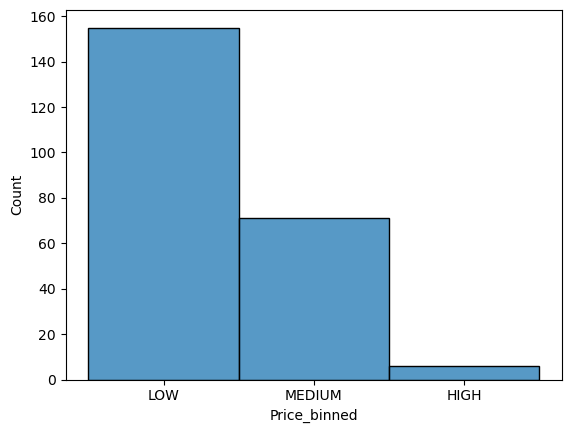

In [246]:
sns.histplot(df["Price_binned"])

# Indicator Variables

Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [247]:
df["Screen"].unique()

array(['IPS Panel', 'Full HD'], dtype=object)

In [248]:
dummy_variable=pd.get_dummies(df["Screen"])
dummy_variable.rename(columns={"Full HD":"Screen_Full HD","IPS Panel":"Screen_IPS Panel"},inplace=True)

In [249]:
dummy_variable.head()

,Screen_Full HD,Screen_IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [250]:
df=pd.concat([df,dummy_variable],axis=1)

In [251]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price_binned,Screen_Full HD,Screen_IPS Panel
0,Acer,4,IPS Panel,2,1,5,14.0,0.235,8,256,3.528,978,LOW,False,True
1,Dell,3,Full HD,1,1,3,15.6,0.471,4,256,4.851,634,LOW,True,False
2,Dell,3,Full HD,1,1,7,15.6,0.882,8,256,4.851,946,LOW,True,False
3,Dell,4,IPS Panel,2,1,5,13.3,0.235,8,128,2.690,1244,LOW,False,True
4,HP,4,Full HD,2,1,7,15.6,0.353,8,256,4.212,837,LOW,True,False


In [252]:
df.drop(columns="Screen",axis=1,inplace=True)

In [253]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price_binned,Screen_Full HD,Screen_IPS Panel
0,Acer,4,2,1,5,14.0,0.235,8,256,3.528,978,LOW,False,True
1,Dell,3,1,1,3,15.6,0.471,4,256,4.851,634,LOW,True,False
2,Dell,3,1,1,7,15.6,0.882,8,256,4.851,946,LOW,True,False
3,Dell,4,2,1,5,13.3,0.235,8,128,2.690,1244,LOW,False,True
4,HP,4,2,1,7,15.6,0.353,8,256,4.212,837,LOW,True,False


In [254]:
df.dtypes

Manufacturer          object
Category               int64
GPU                    int64
OS                     int64
CPU_core               int64
Screen_Size_cm       float64
CPU_frequency        float64
RAM_GB                 int64
Storage_GB_SSD         int64
Weight_kg            float64
Price                  int64
Price_binned        category
Screen_Full HD          bool
Screen_IPS Panel        bool
dtype: object